In [24]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import dtreeviz

In [2]:
import pandas as pd
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [12]:
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = list(X.columns)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1) # 80% training and 20% test

In [45]:
import sklearn
from sklearn.tree import *
dtr_cars = DecisionTreeRegressor(max_depth=4, criterion="absolute_error")
dtr_cars.fit(X_train, y_train)
print(dtr_cars.score(X_test,y_test))

0.6524419581373913


In [46]:
sklearn.metrics.r2_score(dtr_cars.predict(X),y)

0.6462910202939773

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


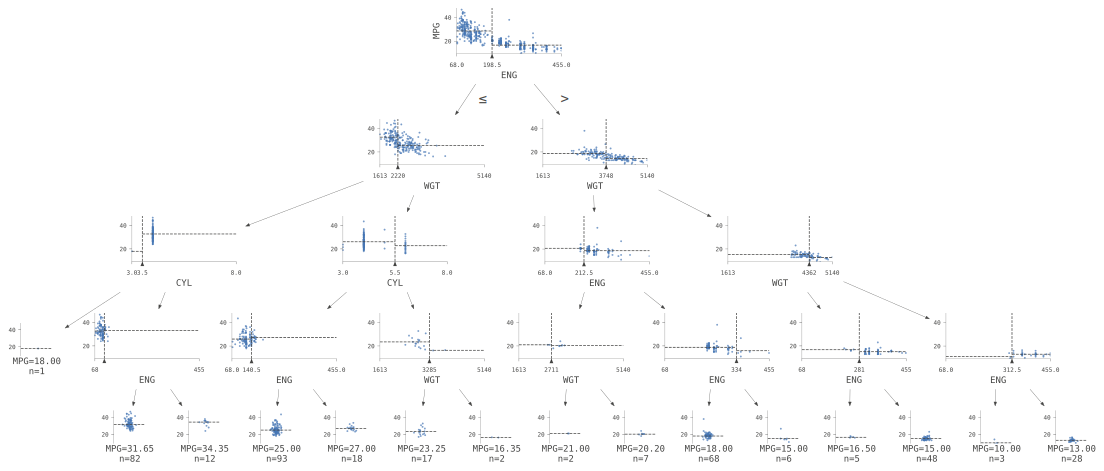

In [47]:
viz_rmodel = dtreeviz.model(dtr_cars, X, y,
                            feature_names=features,
                            target_name='MPG')
viz_rmodel.view(scale=1.0, fontname="monospace")